In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
ratings = pd.read_csv("ratings.csv")
movies = pd.read_csv("movies.csv")

In [8]:
ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [9]:
movies.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [10]:
movies_ratings = pd.merge(ratings, movies, on="movieId")

In [11]:
movies_ratings.columns

Index(['userId', 'movieId', 'rating', 'timestamp', 'title', 'genres'], dtype='object')

In [12]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,296,5.0,1.147880e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
1,3,296,5.0,1.439474e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
2,4,296,4.0,1.573939e+09,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
3,5,296,4.0,8.307862e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
4,7,296,4.0,8.354447e+08,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller


In [13]:
movies_ratings = movies_ratings[['userId', 'movieId', 'genres']]

In [14]:
movies_ratings.columns

Index(['userId', 'movieId', 'genres'], dtype='object')

In [15]:
movies_ratings.head()

,userId,movieId,genres
0,1,296,Comedy|Crime|Drama|Thriller
1,3,296,Comedy|Crime|Drama|Thriller
2,4,296,Comedy|Crime|Drama|Thriller
3,5,296,Comedy|Crime|Drama|Thriller
4,7,296,Comedy|Crime|Drama|Thriller


In [16]:
movies_ratings = movies_ratings.sort_values(by='userId', ascending=True)

In [17]:
movies_ratings.head()

,userId,movieId,genres
0,1,296,Comedy|Crime|Drama|Thriller
610,1,4703,Drama
227,1,1088,Drama|Musical|Romance
612,1,4973,Comedy|Romance
199,1,899,Comedy|Musical|Romance


In [18]:
movies_ratings['genres'] = movies_ratings['genres'].str.split('|')
movies_ratings.head()

,userId,movieId,genres
0,1,296,"[Comedy, Crime, Drama, Thriller]"
610,1,4703,[Drama]
227,1,1088,"[Drama, Musical, Romance]"
612,1,4973,"[Comedy, Romance]"
199,1,899,"[Comedy, Musical, Romance]"


In [19]:
n_movies = movies_ratings['movieId'].nunique()
n_users = movies_ratings['userId'].nunique()

print(f"Number of unique movieId's: {n_movies}")
print(f"Number of unique users: {n_users}")

Number of unique movieId's: 6148
Number of unique users: 345


In [20]:
movie_stats = ratings.groupby('userId')['movieId'].agg(['count'])
movie_stats.head()

,count
userId,
1,70
2,184
3,656
4,242
5,101


In [22]:
# للوصول إلى قيمة العدد للمستخدم ذي الـ userId المحدد
user_id = 5
count_for_user = movie_stats.loc[user_id, 'count']
print(f"The count for user {user_id} is: {count_for_user}")


The count for user 5 is: 101


In [25]:
# قم بتحويل البيانات إلى قاموس
user_movie_dict = {}

for user_id, count_for_user in movie_stats.iterrows():
    user_movie_dict[user_id] = count_for_user['count']

# طباعة النتائج لجميع المستخدمين
for user_id, count_for_user in user_movie_dict.items():
    print(f"The count for user {user_id} is: {count_for_user}")

The count for user 1 is: 70
The count for user 2 is: 184
The count for user 3 is: 656
The count for user 4 is: 242
The count for user 5 is: 101
The count for user 6 is: 26
The count for user 7 is: 25
The count for user 8 is: 155
The count for user 9 is: 178
The count for user 10 is: 53
The count for user 11 is: 24
The count for user 12 is: 736
The count for user 13 is: 412
The count for user 14 is: 31
The count for user 15 is: 70
The count for user 16 is: 24
The count for user 17 is: 29
The count for user 18 is: 187
The count for user 19 is: 458
The count for user 20 is: 78
The count for user 21 is: 103
The count for user 22 is: 22
The count for user 23 is: 371
The count for user 24 is: 25
The count for user 25 is: 87
The count for user 26 is: 39
The count for user 27 is: 60
The count for user 28 is: 49
The count for user 29 is: 34
The count for user 30 is: 35
The count for user 31 is: 399
The count for user 32 is: 33
The count for user 33 is: 23
The count for user 34 is: 32
The count 

In [29]:
# استخدام user_id للحصول على قيمة المستخدم في القاموس
target_user_id = 2000

if target_user_id in user_movie_dict:
    count_for_target_user = user_movie_dict[target_user_id]
    print(f"The count for user {target_user_id} is: {count_for_target_user}")
else:
    print(f"المستخدم {target_user_id} لم يقم بتقييم أي أفلام.")

المستخدم 2000 لم يقم بتقييم أي أفلام.


In [26]:
user_movie_dict

{1: 70,
 2: 184,
 3: 656,
 4: 242,
 5: 101,
 6: 26,
 7: 25,
 8: 155,
 9: 178,
 10: 53,
 11: 24,
 12: 736,
 13: 412,
 14: 31,
 15: 70,
 16: 24,
 17: 29,
 18: 187,
 19: 458,
 20: 78,
 21: 103,
 22: 22,
 23: 371,
 24: 25,
 25: 87,
 26: 39,
 27: 60,
 28: 49,
 29: 34,
 30: 35,
 31: 399,
 32: 33,
 33: 23,
 34: 32,
 35: 50,
 36: 108,
 37: 64,
 38: 249,
 39: 29,
 40: 86,
 41: 199,
 42: 22,
 43: 420,
 44: 55,
 45: 44,
 46: 160,
 47: 70,
 48: 25,
 49: 25,
 50: 81,
 51: 20,
 52: 29,
 53: 27,
 54: 27,
 55: 50,
 56: 30,
 57: 355,
 58: 104,
 59: 362,
 60: 50,
 61: 314,
 62: 205,
 63: 40,
 64: 53,
 65: 34,
 66: 79,
 67: 126,
 68: 41,
 69: 149,
 70: 196,
 71: 36,
 72: 813,
 73: 39,
 74: 22,
 75: 465,
 76: 182,
 77: 45,
 78: 69,
 79: 22,
 80: 517,
 81: 23,
 82: 170,
 83: 28,
 84: 314,
 85: 68,
 86: 148,
 87: 33,
 88: 21,
 89: 188,
 90: 33,
 91: 151,
 92: 88,
 93: 123,
 94: 53,
 95: 216,
 96: 55,
 97: 67,
 98: 145,
 99: 72,
 100: 61,
 101: 122,
 102: 155,
 103: 32,
 104: 43,
 105: 31,
 106: 36,
 107: 27

In [21]:
# تفجير القائمة في عمود 'genres'
exploded_ratings = movies_ratings.explode('genres')

# استخدام groupby لتجميع البيانات بناءً على 'userId' و 'genres'، ثم حساب حجم كل مجموعة
user_genre_counts = exploded_ratings.groupby(['userId', 'genres']).size().reset_index(name='No.Of Frequency')

# طباعة النتائج
user_genre_counts.head()


,userId,genres,No.Of Frequency
0,1,Action,4
1,1,Adventure,11
2,1,Animation,2
3,1,Children,3
4,1,Comedy,23


In [18]:
from collections import Counter

genre_frequency = Counter(g for genres in movies_ratings['genres'] for g in genres)

print(f"There are {len(genre_frequency)} genres.")

genre_frequency

There are 20 genres.


Counter({'Comedy': 30561,
         'Crime': 14142,
         'Drama': 37355,
         'Thriller': 23211,
         'Mystery': 6681,
         'Romance': 15972,
         'War': 4564,
         'Musical': 3265,
         'Action': 25528,
         'Adventure': 19686,
         'Fantasy': 9268,
         'Sci-Fi': 14483,
         'Western': 1693,
         'Children': 7152,
         'Film-Noir': 633,
         'Documentary': 836,
         'Animation': 5488,
         'Horror': 6225,
         'IMAX': 3628,
         '(no genres listed)': 29})

In [19]:
print("The 5 most common genres: \n", genre_frequency.most_common(5))

The 5 most common genres: 
 [('Drama', 37355), ('Comedy', 30561), ('Action', 25528), ('Thriller', 23211), ('Adventure', 19686)]


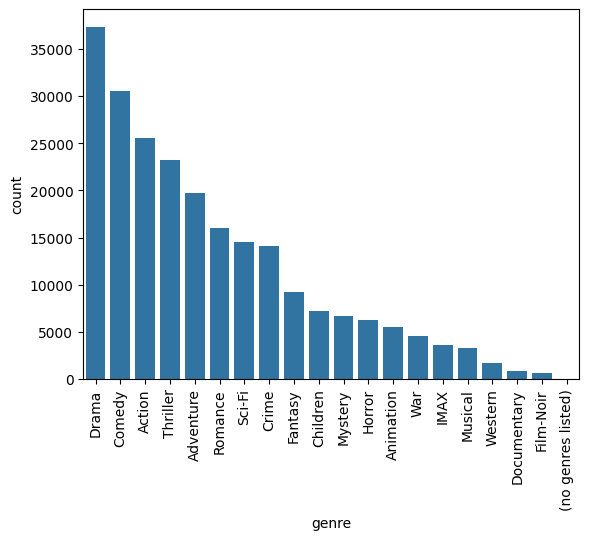

In [20]:
genre_frequency_df = pd.DataFrame([genre_frequency]).T.reset_index()
genre_frequency_df.columns = ['genre', 'count']

sns.barplot(x='genre', y='count', data=genre_frequency_df.sort_values(by='count', ascending=False))
plt.xticks(rotation=90)
plt.show()

In [41]:
# قم بتحديد المستخدم
user_id_to_find = 2

# قم بالتكرار على كل الـ genres الممكنة
for genre_to_find in user_genre_counts['genres'].unique():
    # استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
    frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
    number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0
    # قم بطباعة القيمة

    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")


The No.Of Frequency for user '2' and genre 'Action' is: [66]
The No.Of Frequency for user '2' and genre 'Adventure' is: [75]
The No.Of Frequency for user '2' and genre 'Animation' is: [17]
The No.Of Frequency for user '2' and genre 'Children' is: [25]
The No.Of Frequency for user '2' and genre 'Comedy' is: [63]
The No.Of Frequency for user '2' and genre 'Crime' is: [18]
The No.Of Frequency for user '2' and genre 'Documentary' is: [0]
The No.Of Frequency for user '2' and genre 'Drama' is: [91]
The No.Of Frequency for user '2' and genre 'Fantasy' is: [29]
The No.Of Frequency for user '2' and genre 'Film-Noir' is: [0]
The No.Of Frequency for user '2' and genre 'Horror' is: [3]
The No.Of Frequency for user '2' and genre 'Musical' is: [11]
The No.Of Frequency for user '2' and genre 'Mystery' is: [8]
The No.Of Frequency for user '2' and genre 'Romance' is: [34]
The No.Of Frequency for user '2' and genre 'Sci-Fi' is: [28]
The No.Of Frequency for user '2' and genre 'Thriller' is: [30]
The No.O

In [31]:
# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة وكل المستخدمين
for user_id, genre, number_of_times in user_genre_counts.itertuples(index=False):
    # استخدم الزوج (user_id, genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[(user_id, genre)] = number_of_times

# طباعة النتائج في القاموس
for (user_id, genre), number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id}' and genre '{genre}' is: [{number_of_times}]")

Streaming output truncated to the last 5000 lines.
The No.Of Frequency for user '40' and genre 'IMAX' is: [2]
The No.Of Frequency for user '40' and genre 'Musical' is: [1]
The No.Of Frequency for user '40' and genre 'Mystery' is: [12]
The No.Of Frequency for user '40' and genre 'Romance' is: [9]
The No.Of Frequency for user '40' and genre 'Sci-Fi' is: [11]
The No.Of Frequency for user '40' and genre 'Thriller' is: [34]
The No.Of Frequency for user '40' and genre 'War' is: [8]
The No.Of Frequency for user '40' and genre 'Western' is: [3]
The No.Of Frequency for user '41' and genre 'Action' is: [161]
The No.Of Frequency for user '41' and genre 'Adventure' is: [77]
The No.Of Frequency for user '41' and genre 'Animation' is: [2]
The No.Of Frequency for user '41' and genre 'Children' is: [2]
The No.Of Frequency for user '41' and genre 'Comedy' is: [42]
The No.Of Frequency for user '41' and genre 'Crime' is: [41]
The No.Of Frequency for user '41' and genre 'Drama' is: [64]
The No.Of Frequenc

In [32]:
user_genre_dict

{(1, 'Action'): 4,
 (1, 'Adventure'): 11,
 (1, 'Animation'): 2,
 (1, 'Children'): 3,
 (1, 'Comedy'): 23,
 (1, 'Crime'): 8,
 (1, 'Documentary'): 1,
 (1, 'Drama'): 53,
 (1, 'Fantasy'): 5,
 (1, 'Film-Noir'): 1,
 (1, 'Horror'): 1,
 (1, 'Musical'): 5,
 (1, 'Mystery'): 4,
 (1, 'Romance'): 18,
 (1, 'Sci-Fi'): 5,
 (1, 'Thriller'): 5,
 (1, 'War'): 5,
 (1, 'Western'): 1,
 (2, 'Action'): 66,
 (2, 'Adventure'): 75,
 (2, 'Animation'): 17,
 (2, 'Children'): 25,
 (2, 'Comedy'): 63,
 (2, 'Crime'): 18,
 (2, 'Drama'): 91,
 (2, 'Fantasy'): 29,
 (2, 'Horror'): 3,
 (2, 'IMAX'): 6,
 (2, 'Musical'): 11,
 (2, 'Mystery'): 8,
 (2, 'Romance'): 34,
 (2, 'Sci-Fi'): 28,
 (2, 'Thriller'): 30,
 (2, 'War'): 15,
 (2, 'Western'): 5,
 (3, '(no genres listed)'): 1,
 (3, 'Action'): 334,
 (3, 'Adventure'): 198,
 (3, 'Animation'): 50,
 (3, 'Children'): 48,
 (3, 'Comedy'): 176,
 (3, 'Crime'): 132,
 (3, 'Documentary'): 3,
 (3, 'Drama'): 232,
 (3, 'Fantasy'): 78,
 (3, 'Film-Noir'): 5,
 (3, 'Horror'): 45,
 (3, 'IMAX'): 81,
 (3, 

In [33]:
# قم بتحديد المستخدم
user_id_to_find = 1

# قم بتكوين القاموس لتخزين النتائج
user_genre_dict = {}

# قم بالتكرار على كل الـ genres الممكنة للمستخدم المحدد
for genre_to_find, number_of_times in user_genre_counts.query(f'userId == {user_id_to_find}').loc[:, ['genres', 'No.Of Frequency']].itertuples(index=False):
    # استخدم القيمة (genre) كمفتاح للقاموس و `No.Of Frequency` كقيمة.
    user_genre_dict[genre_to_find] = number_of_times

# طباعة النتائج في القاموس
for genre, number_of_times in user_genre_dict.items():
    print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre}' is: [{number_of_times}]")

The No.Of Frequency for user '1' and genre 'Action' is: [4]
The No.Of Frequency for user '1' and genre 'Adventure' is: [11]
The No.Of Frequency for user '1' and genre 'Animation' is: [2]
The No.Of Frequency for user '1' and genre 'Children' is: [3]
The No.Of Frequency for user '1' and genre 'Comedy' is: [23]
The No.Of Frequency for user '1' and genre 'Crime' is: [8]
The No.Of Frequency for user '1' and genre 'Documentary' is: [1]
The No.Of Frequency for user '1' and genre 'Drama' is: [53]
The No.Of Frequency for user '1' and genre 'Fantasy' is: [5]
The No.Of Frequency for user '1' and genre 'Film-Noir' is: [1]
The No.Of Frequency for user '1' and genre 'Horror' is: [1]
The No.Of Frequency for user '1' and genre 'Musical' is: [5]
The No.Of Frequency for user '1' and genre 'Mystery' is: [4]
The No.Of Frequency for user '1' and genre 'Romance' is: [18]
The No.Of Frequency for user '1' and genre 'Sci-Fi' is: [5]
The No.Of Frequency for user '1' and genre 'Thriller' is: [5]
The No.Of Freque

In [34]:
user_id_to_find = 1
genre_to_find = 'Drama'

# استخدم عملية الاستعلام للعثور على القيمة واستخراج القيمة بدلاً من القائمة
frequency_value = user_genre_counts.query(f'userId == {user_id_to_find} and genres == "{genre_to_find}"')['No.Of Frequency'].values
number_of_times = frequency_value[0] if len(frequency_value) > 0 else 0

# طباعة النتائج
print(f"The No.Of Frequency for user '{user_id_to_find}' and genre '{genre_to_find}' is: [{number_of_times}]")

The No.Of Frequency for user '1' and genre 'Drama' is: [53]


In [36]:
def user_behavior_probability(total_movies, genre_label_count):
    user_behavior_prob = genre_label_count / total_movies
    return round(user_behavior_prob, 3)


In [37]:
user_behavior_probability(70, 4)

0.057

In [42]:
# قم بتكوين القاموس لتخزين نتائج الاحتمالات لكل تصنيف (genre) لكل مستخدم
user_genre_probabilities = []

for user_id, genre, genre_count in user_genre_counts.itertuples(index=False):
    # احتمال تصنيف المستخدم للتصنيف (genre) الحالي
    probability = user_behavior_probability(user_movie_dict[user_id], genre_count)

    # استخدم الزوج (user_id, genre) كمفتاح للقاموس والاحتمال كقيمة
    user_genre_probabilities.append({'User_ID': user_id, 'Genre': genre, 'Probability': probability})

# تحويل النتائج إلى DataFrame
results_df = pd.DataFrame(user_genre_probabilities)

# استخدام fillna لتعويض القيم الفارغة بصفر (إذا لزم الأمر)
pivot_results.fillna(0, inplace=True)

# ضبط إعدادات pandas لعرض جميع الصفوف والأعمدة
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

pivot_results.head(345)

Genre,User_ID,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,0.000,0.057,0.157,0.029,0.043,0.329,0.114,0.014,0.757,0.071,0.014,0.014,0.000,0.071,0.057,0.257,0.071,0.071,0.071,0.014
1,2,0.000,0.359,0.408,0.092,0.136,0.342,0.098,0.000,0.495,0.158,0.000,0.016,0.033,0.060,0.043,0.185,0.152,0.163,0.082,0.027
2,3,0.002,0.509,0.302,0.076,0.073,0.268,0.201,0.005,0.354,0.119,0.008,0.069,0.123,0.009,0.091,0.091,0.341,0.364,0.040,0.012
3,4,0.000,0.599,0.471,0.128,0.116,0.335,0.153,0.021,0.202,0.161,0.000,0.041,0.169,0.029,0.074,0.041,0.351,0.231,0.037,0.037
4,5,0.000,0.178,0.208,0.040,0.089,0.485,0.139,0.000,0.446,0.079,0.000,0.030,0.030,0.069,0.069,0.198,0.109,0.238,0.020,0.050
5,6,0.000,0.231,0.231,0.000,0.077,0.077,0.231,0.000,0.731,0.038,0.038,0.038,0.000,0.077,0.038,0.231,0.154,0.115,0.192,0.000
6,7,0.000,0.240,0.240,0.080,0.120,0.320,0.280,0.000,0.520,0.120,0.000,0.040,0.080,0.080,0.000,0.240,0.040,0.320,0.040,0.040
7,8,0.000,0.329,0.219,0.065,0.090,0.297,0.142,0.000,0.419,0.071,0.006,0.058,0.019,0.065,0.116,0.187,0.168,0.381,0.045,0.026
8,9,0.000,0.247,0.253,0.039,0.197,0.354,0.090,0.006,0.376,0.101,0.000,0.118,0.006,0.096,0.039,0.174,0.163,0.225,0.073,0.039
9,10,0.000,0.340,0.245,0.057,0.057,0.283,0.208,0.038,0.377,0.057,0.000,0.151,0.019,0.038,0.094,0.151,0.245,0.415,0.057,0.000
